# Learning Objectives
- Understand the RL training pipeline in IsaacLab:
    - Environment & Agent Setup
    - Training process
    - Performance evaluation
        - Viewing learning performance logs
        - Viewing trained agent play in environment
- Understand the IsaacLab workflow Manager-Based RL Environment for implementation your RL project setup in IsaacLab:
    - Action
    - Observation
    - Event
    - Reward
    - Termination

- Connect practical experience with theoretical RL knowledge.


## Part 1: Take a Look at Cartpole Rl Agent

### Questions

#### Submit the answers to the following questions:

#### Question 1:

- According to the tutorials, if we want to edit the environment configuration, action space, observation space, reward function, or termination condition of the Isaac-Cartpole-v0 task, which file should we look at, and where is each part located?

#### Answer 1:

- For configuration of the Isaac-Cratpole-v0 task we need to config at ManagerBasedRLEnv that can find at this path (../source/extensions/omni.isaac.lab_tasks/omni/isaac/lab_tasks/manager_based)
- Because at the ../source/extensions/omni.isaac.lab_tasks/omni/isaac/lab_tasks/manager_based/classic/cartpole/__init__.py you will see this code

In [ ]:
# Copyright (c) 2022-2025, The Isaac Lab Project Developers.
# All rights reserved.
#
# SPDX-License-Identifier: BSD-3-Clause

"""
Cartpole balancing environment.
"""

import gymnasium as gym

from . import agents

##
# Register Gym environments.
##

gym.register(
    id="Isaac-Cartpole-v0",
    entry_point="omni.isaac.lab.envs:ManagerBasedRLEnv",
    disable_env_checker=True,
    kwargs={
        "env_cfg_entry_point": f"{__name__}.cartpole_env_cfg:CartpoleEnvCfg",
        "rl_games_cfg_entry_point": f"{agents.__name__}:rl_games_ppo_cfg.yaml",
        "rsl_rl_cfg_entry_point": f"{agents.__name__}.rsl_rl_ppo_cfg:CartpolePPORunnerCfg",
        "skrl_cfg_entry_point": f"{agents.__name__}:skrl_ppo_cfg.yaml",
        "sb3_cfg_entry_point": f"{agents.__name__}:sb3_ppo_cfg.yaml",
    },
)

gym.register(
    id="Isaac-Cartpole-RGB-v0",
    entry_point="omni.isaac.lab.envs:ManagerBasedRLEnv",
    disable_env_checker=True,
    kwargs={
        "env_cfg_entry_point": f"{__name__}.cartpole_camera_env_cfg:CartpoleRGBCameraEnvCfg",
        "rl_games_cfg_entry_point": f"{agents.__name__}:rl_games_camera_ppo_cfg.yaml",
    },
)

gym.register(
    id="Isaac-Cartpole-Depth-v0",
    entry_point="omni.isaac.lab.envs:ManagerBasedRLEnv",
    disable_env_checker=True,
    kwargs={
        "env_cfg_entry_point": f"{__name__}.cartpole_camera_env_cfg:CartpoleDepthCameraEnvCfg",
        "rl_games_cfg_entry_point": f"{agents.__name__}:rl_games_camera_ppo_cfg.yaml",
    },
)

gym.register(
    id="Isaac-Cartpole-RGB-ResNet18-v0",
    entry_point="omni.isaac.lab.envs:ManagerBasedRLEnv",
    disable_env_checker=True,
    kwargs={
        "env_cfg_entry_point": f"{__name__}.cartpole_camera_env_cfg:CartpoleResNet18CameraEnvCfg",
        "rl_games_cfg_entry_point": f"{agents.__name__}:rl_games_feature_ppo_cfg.yaml",
    },
)

gym.register(
    id="Isaac-Cartpole-RGB-TheiaTiny-v0",
    entry_point="omni.isaac.lab.envs:ManagerBasedRLEnv",
    disable_env_checker=True,
    kwargs={
        "env_cfg_entry_point": f"{__name__}.cartpole_camera_env_cfg:CartpoleTheiaTinyCameraEnvCfg",
        "rl_games_cfg_entry_point": f"{agents.__name__}:rl_games_feature_ppo_cfg.yaml",
    },
)

- From the code you will see id="Isaac-Cartpole-v0" is in the Manager-Based Environments that mean if you want to config the Isaac-Cartpole-v0 you need to config at (../source/extensions/omni.isaac.lab_tasks/omni/isaac/lab_tasks/manager_based)

- Finally the config are in file name cartpole_env_cfg.py ../source/extensions/omni.isaac.lab_tasks/omni/isaac/lab_tasks/manager_based/classic/cartpole/cartpole_env_cfg.py

- To verify that path are really can config the Isaac-Cartpole-v0 i try to edit some rewards configuration from this

In [ ]:
@configclass
class RewardsCfg:
    """Reward terms for the MDP."""

    # (1) Constant running reward
    alive = RewTerm(func=mdp.is_alive, weight=1.0)
    # (2) Failure penalty
    terminating = RewTerm(func=mdp.is_terminated, weight=-2.0)
    # (3) Primary task: keep pole upright
    pole_pos = RewTerm(
        func=mdp.joint_pos_target_l2,
        weight=-1.0,
        params={"asset_cfg": SceneEntityCfg("robot", joint_names=["cart_to_pole"]), "target": 0.0},
    )
    # (4) Shaping tasks: lower cart velocity
    cart_vel = RewTerm(
        func=mdp.joint_vel_l1,
        weight=-0.01,
        params={"asset_cfg": SceneEntityCfg("robot", joint_names=["slider_to_cart"])},
    )
    # (5) Shaping tasks: lower pole angular velocity
    pole_vel = RewTerm(
        func=mdp.joint_vel_l1,
        weight=-0.005,
        params={"asset_cfg": SceneEntityCfg("robot", joint_names=["cart_to_pole"])},
    )

- To this

In [ ]:
@configclass
class RewardsCfg:
    """Reward terms for the MDP."""

    # (1) Constant running reward
    alive = RewTerm(func=mdp.is_alive, weight=2.0)
    # (2) Failure penalty
    terminating = RewTerm(func=mdp.is_terminated, weight=-2.0)
    # (3) Primary task: keep pole upright
    pole_pos = RewTerm(
        func=mdp.joint_pos_target_l2,
        weight=-1.0,
        params={"asset_cfg": SceneEntityCfg("robot", joint_names=["cart_to_pole"]), "target": 0.0},
    )
    # (4) Shaping tasks: lower cart velocity
    cart_vel = RewTerm(
        func=mdp.joint_vel_l1,
        weight=-0.01,
        params={"asset_cfg": SceneEntityCfg("robot", joint_names=["slider_to_cart"])},
    )
    # (5) Shaping tasks: lower pole angular velocity
    pole_vel = RewTerm(
        func=mdp.joint_vel_l1,
        weight=-0.005,
        params={"asset_cfg": SceneEntityCfg("robot", joint_names=["cart_to_pole"])},
    )

- The result after train of 2 different reward config as your see it the result are different too

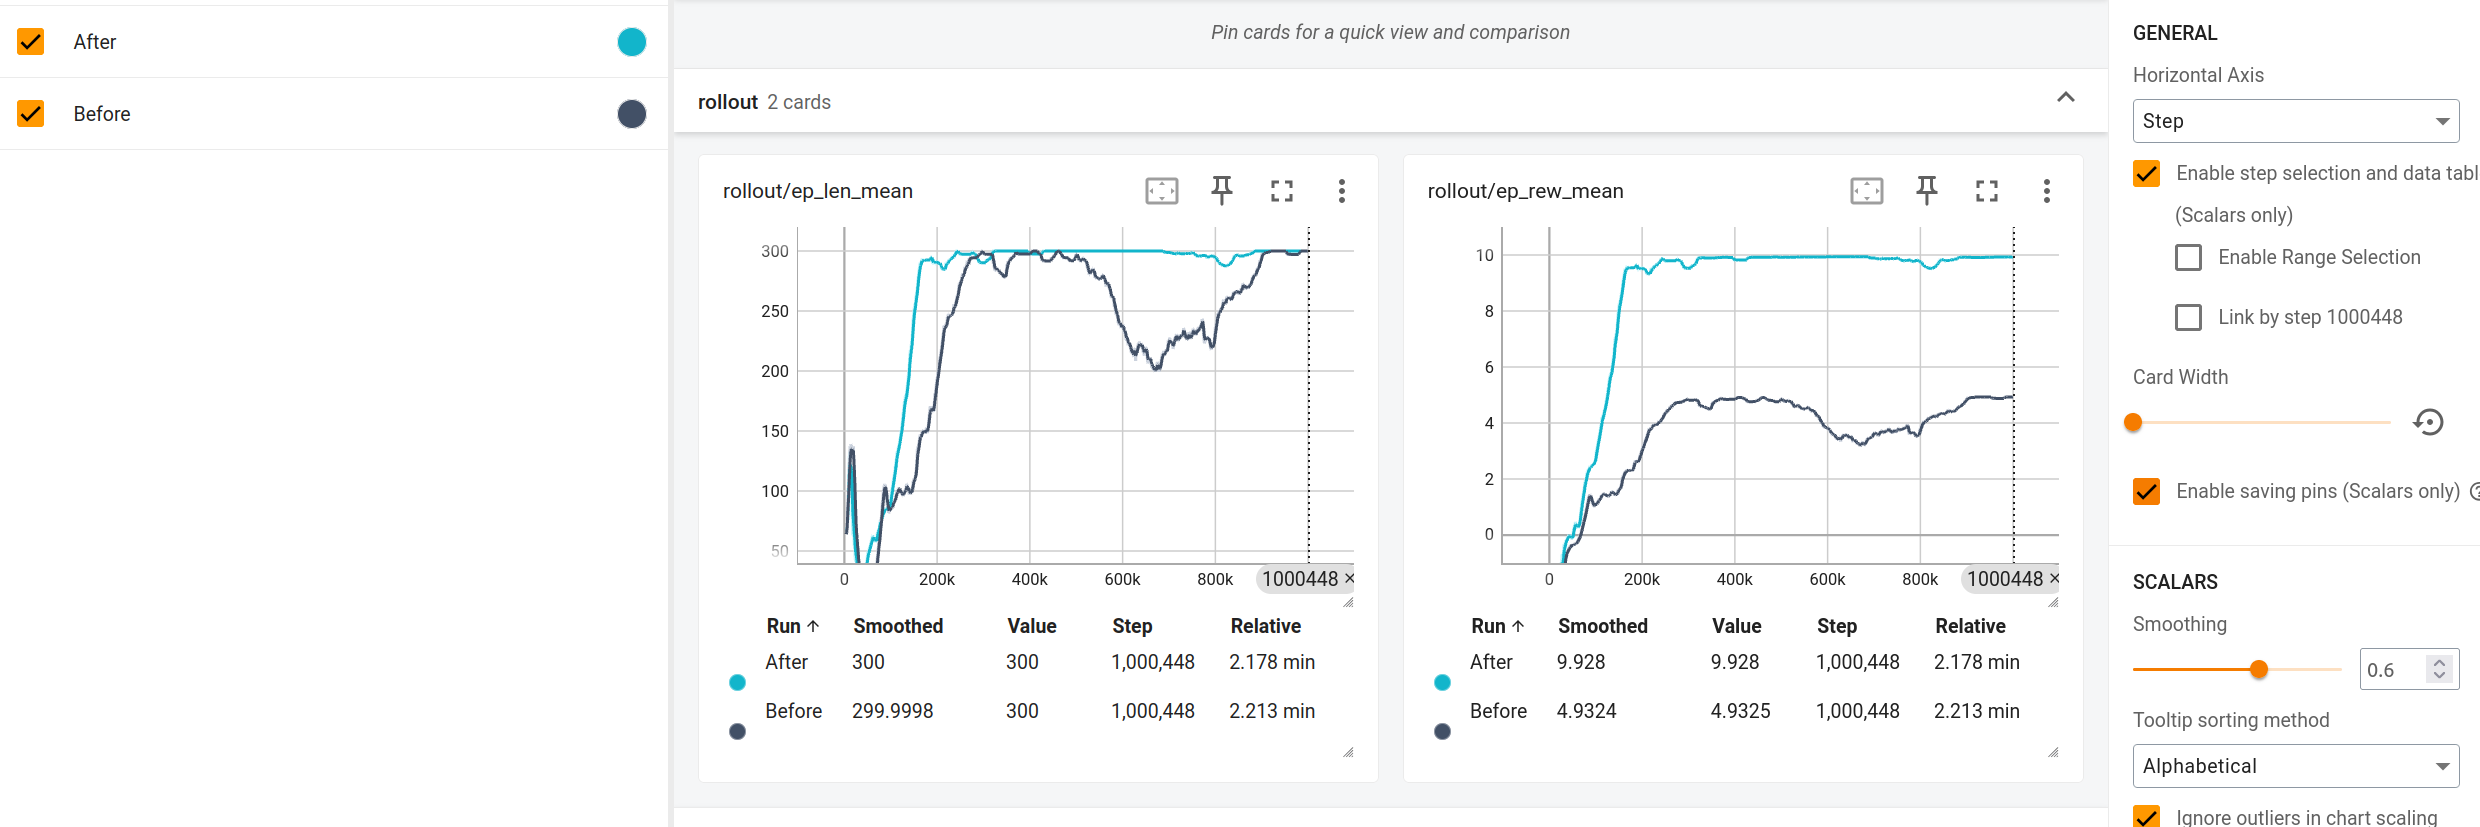

#### Question 2:

- What are the action space and observation space for an agent defined in the Isaac-Cartpole-v0 task?

- ANS:
    - action is joint_effort 
    - observations is joint_position and joint_velocity
    - action space is dimention of action in Cartpole-V0 is 1 
    - observations space is dimention of observations in Cartpole-V0 is 4 

In [ ]:
@configclass
class ActionsCfg:
    """Action specifications for the MDP."""

    joint_effort = mdp.JointEffortActionCfg(asset_name="robot", joint_names=["slider_to_cart"], scale=100.0)


@configclass
class ObservationsCfg:
    """Observation specifications for the MDP."""

    @configclass
    class PolicyCfg(ObsGroup):
        """Observations for policy group."""

        # observation terms (order preserved)
        joint_pos_rel = ObsTerm(func=mdp.joint_pos_rel)
        joint_vel_rel = ObsTerm(func=mdp.joint_vel_rel)

        def __post_init__(self) -> None:
            self.enable_corruption = False
            self.concatenate_terms = True

    # observation groups
    policy: PolicyCfg = PolicyCfg()

#### Question 3:

- How can episodes in the Isaac-Cartpole-v0 task be terminated?

- ANS: 
    1. Time out
    2. Cart out of bounds -3 to 3  

In [ ]:
@configclass
class TerminationsCfg:
    """Termination terms for the MDP."""

    # (1) Time out
    time_out = DoneTerm(func=mdp.time_out, time_out=True)
    # (2) Cart out of bounds
    cart_out_of_bounds = DoneTerm(
        func=mdp.joint_pos_out_of_manual_limit,
        params={"asset_cfg": SceneEntityCfg("robot", joint_names=["slider_to_cart"]), "bounds": (-3.0, 3.0)},
    )action_space

#### Question 4:

- How many reward terms are used to train an agent in the Isaac-Cartpole-v0 task?


- ANS: 5 Term call alive terminationg pole_pos cart_vel pole_vel

In [ ]:
@configclass
class RewardsCfg:
    """Reward terms for the MDP."""

    # (1) Constant running reward
    alive = RewTerm(func=mdp.is_alive, weight=1.0)
    # (2) Failure penalty
    terminating = RewTerm(func=mdp.is_terminated, weight=-2.0)
    # (3) Primary task: keep pole upright
    pole_pos = RewTerm(
        func=mdp.joint_pos_target_l2,
        weight=-1.0,
        params={"asset_cfg": SceneEntityCfg("robot", joint_names=["cart_to_pole"]), "target": 0.0},
    )
    # (4) Shaping tasks: lower cart velocity
    cart_vel = RewTerm(
        func=mdp.joint_vel_l1,
        weight=-0.01,
        params={"asset_cfg": SceneEntityCfg("robot", joint_names=["slider_to_cart"])},
    )
    # (5) Shaping tasks: lower pole angular velocity
    pole_vel = RewTerm(
        func=mdp.joint_vel_l1,
        weight=-0.005,
        params={"asset_cfg": SceneEntityCfg("robot", joint_names=["cart_to_pole"])},
    )

## Part 2: Playing with Cartpole Rl Agent

- Let us adjust the weight of each reward term specified in the Isaac-Cartpole-v0 task and train the agent. Which results will be affected by this adjustment, and why? Submit the answers.

- You may further explore by modifying other aspects, such as the agent's action space, observation space, and termination conditions.

From the previous question we can see the reward terms have 5 terms that
1. Alive 
    - If agents are not terminated, they will get this reward
    - Default weight = 1.0
2. Terminating
    - If agents are terminated, they will get penalty
    - Have two cases to get terminated: out of boundary (-3 to 3) and time out (300 steps)
    - Default weight = -2.0
3. Pole_pos
    - Agents will get a reward depending on how much pole position deviates from a target value (if weight is negative, it means a high deviation; the reward will decrease).
    - Target value = 0.0 (Swing-up)
    - Default weight = -1.0
4. Cart_vel
    - Agents will get a reward depending on cart velocity (if weight is nagative, it means a high velocity; the reward will decrease)
    - Default weight = -0.01
5. Pole_vel
    - Agents will get a reward depending on pole angular velocity (if weight is nagative, it means a high angular velocity; the reward will decrease)
    - Default weight = -0.005


We will adjust the weight of each reward term (only increase and decrease, not switch positive or negative weight)

### Default

In this adjustment we will focus results from 3 info that rollout/ep_len_mean, rollout/ep_rew_mean, and video at 2000 and 14000 steps like below

<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 10px; width: 100%;">
    <!-- Image 1 -->
    <div style="text-align: center;">
        <img src="pic&video/Default_eplen.png" alt="Image 1" style="width: 100%; height: auto; border-radius: 10px;">
        <p>ep_len_mean</p>
    </div>
    <!-- Image 2 -->
    <div style="text-align: center;">
        <img src="pic&video/Default_rew.png" alt="Image 2" style="width: 100%; height: auto; border-radius: 10px;">
        <p>ep_rew_mean</p>
    </div>
    <!-- Video 1 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/Default-2000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>default_2000step</p>
    </div>
    <!-- Video 2 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/Default-14000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>default_14000step</p>
    </div>
</div>

ep_len_mean(Episode length mean) (step)
- this value are represent to how much step that agent are still alive (does not got terminate)
- maximum of this value can be calculate from "episode_length_steps = ceil(episode_length_s / (decimation_rate * physics_time_step))" in this train ep_len_mean ae max at 300 step

In [ ]:
# Post initialization
    def __post_init__(self) -> None:
        """Post initialization."""
        # general settings
        self.decimation = 2
        self.episode_length_s = 5
        # viewer settings
        self.viewer.eye = (8.0, 0.0, 5.0)
        # simulation settings
        self.sim.dt = 1 / 120
        self.sim.render_interval = self.decimation

ep_rew_mean(Episode reward mean)
- his value are represent mean of cumulative reward of each agents

### Adjust Alive

Adjust Alive weight to 0.5 and 2.0

<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 10px; width: 100%;">
    <!-- Image 1 -->
    <div style="text-align: center;">
        <img src="pic&video/Alive_eplen.png" alt="Image 1" style="width: 100%; height: auto; border-radius: 10px;">
        <p>ep_len_mean</p>
    </div>
    <!-- Image 2 -->
    <div style="text-align: center;">
        <img src="pic&video/Alive_rew.png" alt="Image 2" style="width: 100%; height: auto; border-radius: 10px;">
        <p>ep_rew_mean</p>
    </div>
    <!-- Video 1 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/Alive0.5_2000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Alive0.5_2000step</p>
    </div>
    <!-- Video 2 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/Alive0.5_14000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Alive0.5_14000step</p>
    </div>
    <!-- Video 3 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/Alive2_2000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Alive2_2000step</p>
    </div>
    <!-- Video 4 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/Alive2_14000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Alive2_14000step</p>
    </div>
</div>

#### Conclusion After Alive Adjustment

- From the episode length mean graph, you will see if you increase the Alive weight, episode length mean are converges to the maximum value (300 steps) faster than another case, and it seems more stable.
- But if you decrease the Alive weight it effect it to unstable (as can be seen from episode length mean graph at last step) 
- From the video, you will see the cart of less Alive weight move faster and get terminated before the cart of higher Alive weight.
- Because a higher alive weight means the agent will get more reward (as can be seen from the episode reward mean graph) when it is alive, that makes the agent try to stay alive longer than with a lower alive weight.

### Adjust Terminate

Adjust Terminate to -1 and -4

<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 10px; width: 100%;">
    <!-- Image 1 -->
    <div style="text-align: center;">
        <img src="pic&video/Terminate_eplen.png" alt="Image 1" style="width: 100%; height: auto; border-radius: 10px;">
        <p>ep_len_mean</p>
    </div>
    <!-- Image 2 -->
    <div style="text-align: center;">
        <img src="pic&video/Terminate_rew.png" alt="Image 2" style="width: 100%; height: auto; border-radius: 10px;">
        <p>ep_rew_mean</p>
    </div>
    <!-- Video 1 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/Ter-1_2000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Terminate-1_2000step</p>
    </div>
    <!-- Video 2 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/Ter-1_14000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Terminate-1_14000step</p>
    </div>
    <!-- Video 3 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/Ter-4_2000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Terminate-4_2000step</p>
    </div>
    <!-- Video 4 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/Ter-4_14000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Terminate-4_14000step</p>
    </div>
</div>

#### Conclusion After Terminate Adjustment

- From the episode length mean graph, you will see if you decrease the Terminate weight, episode length mean will stable faster than another case.(as can be seen from the episode length mean graph at 600k step)
- From the video, you will see the cart of less Terminate weight(-4) move slower and get terminated after the cart of higher Terminate weight(-1).
- Because a lower terminate weight means the agent will get more penalty when it got terminate(as can be seen from the episode reward mean graph at 0-100k step),that makes the agent try to avoid terminate than a higher terminate weight.

### Adjust Pole_pos

Adjust Pole pos to -0.5 and -5

<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 10px; width: 100%;">
    <!-- Image 1 -->
    <div style="text-align: center;">
        <img src="pic&video/Pole_pos_eplen.png" alt="Image 1" style="width: 100%; height: auto; border-radius: 10px;">
        <p>ep_len_mean</p>
    </div>
    <!-- Image 2 -->
    <div style="text-align: center;">
        <img src="pic&video/Pole_pos_rew.png" alt="Image 2" style="width: 100%; height: auto; border-radius: 10px;">
        <p>ep_rew_mean</p>
    </div>
    <!-- Video 1 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/polepos-0.5_2000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Pole_pos-0.5_2000step</p>
    </div>
    <!-- Video 2 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/polepos-0.5_14000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Pole_pos-0.5_14000step</p>
    </div>
    <!-- Video 3 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/polepos-5_2000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Pole_pos-5_2000step</p>
    </div>
    <!-- Video 4 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/polepos-5_14000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Pole_pos-5_14000step</p>
    </div>
</div>

#### Conclusion After Pole_pos Adjustment

- From the episode length mean graph, you will see if you increase the Pole_pos weight, episode length mean are converges to the maximum value (300 steps) faster than another case (as can be seen from the episode length mean graph at 200k step)
- From the video, you will see the cart of less Pole_pos weight(-5) pole position are nearly to the target but it seem oscillate more than the cart of higher Pole_pos weight(-0.5).
- Because a lower Pole_pos weight means the agent will get more penalty when pole position are far from the target(as can be seen from the episode reward mean graph),that makes the agent try to move pole to target more than higher Pole_pos weight

### Adjust Cart_vel

Adjust Cart_vel to -0.001 and -0.1

<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 10px; width: 100%;">
    <!-- Image 1 -->
    <div style="text-align: center;">
        <img src="pic&video/Cart_vel_eplen.png" alt="Image 1" style="width: 100%; height: auto; border-radius: 10px;">
        <p>ep_len_mean</p>
    </div>
    <!-- Image 2 -->
    <div style="text-align: center;">
        <img src="pic&video/Cart_vel_rew.png" alt="Image 2" style="width: 100%; height: auto; border-radius: 10px;">
        <p>ep_rew_mean</p>
    </div>
    <!-- Video 1 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/Cartvel-0.001_2000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Cart_vel-0.001_2000step</p>
    </div>
    <!-- Video 2 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/Cartvel-0.001_14000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Cart_vel-0.001_14000step</p>
    </div>
    <!-- Video 3 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/Cartvel-0.1_2000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Cart_vel-0.1_2000step</p>
    </div>
    <!-- Video 4 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/Cartvel-0.1_14000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Cart_vel-0.1_14000step</p>
    </div>
</div>

#### Conclusion After Cart_vel Adjustment

- From the episode length mean graph, you will see if you decrease the Cart_vel weight, episode length mean are converges to the maximum value (300 steps) faster than another case (as can be seen from the episode length mean graph at 200k step)
- And it seem get stable faster than Default value
- From the video, you will see the cart of less Cart_vel weight(-0.1) are move slower than the cart of higher Cart_vel weight(-0.001).
- Because a lower Cart_vel weight means the agent will get more penalty when the cart move faster(as can be seen from the episode reward mean graph),that makes the agent try to move cart slower to avoid penalty

### Adjust Pole_vel

Adjust Pole_vel to -0.0005 and -0.05

<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 10px; width: 100%;">
    <!-- Image 1 -->
    <div style="text-align: center;">
        <img src="pic&video/Pole_vel_eplen.png" alt="Image 1" style="width: 100%; height: auto; border-radius: 10px;">
        <p>ep_len_mean</p>
    </div>
    <!-- Image 2 -->
    <div style="text-align: center;">
        <img src="pic&video/Pole_vel_rew.png" alt="Image 2" style="width: 100%; height: auto; border-radius: 10px;">
        <p>ep_rew_mean</p>
    </div>
    <!-- Video 1 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/polevel-0.0005_2000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Pole_vel-0.0005_2000step</p>
    </div>
    <!-- Video 2 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/polevel-0.0005_14000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Pole_vel-0.0005_14000step</p>
    </div>
    <!-- Video 3 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/polevel-0.05_2000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Pole_vel-0.05_2000step</p>
    </div>
    <!-- Video 4 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/polevel-0.05_14000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Pole_vel-0.05_14000step</p>
    </div>
</div>

#### Conclusion After Pole_vel Adjustment

- From the episode length mean graph, you will see if you decrease the Pole_vel weight, episode length mean will stable faster than another case.(as can be seen from the episode length mean graph at 200k step)
- But if you decrease the Pole_vel weight episode length mean seem unstable (as can be seen from the episode length mean graph at 400k-700k step)
- From the video, you will see the pole of less Pole_vel weight(-0.05) are move slower than the pole of higher Pole_vel weight(-0.0005).
- Because a lower Pole_vel weight means the agent will get more penalty when the pole move faster(as can be seen from the episode reward mean graph),that makes the agent try to move pole slower to avoid penalty

### Adjust Episode length second

Adjust Episode length second to 10 seconds

<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 10px; width: 100%;">
    <!-- Image 1 -->
    <div style="text-align: center;">
        <img src="pic&video/Ep_len_eplen.png" alt="Image 1" style="width: 100%; height: auto; border-radius: 10px;">
        <p>ep_len_mean</p>
    </div>
    <!-- Image 2 -->
    <div style="text-align: center;">
        <img src="pic&video/Ep_len_rew.png" alt="Image 2" style="width: 100%; height: auto; border-radius: 10px;">
        <p>ep_rew_mean</p>
    </div>
    <!-- Video 1 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/Default-2000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>default_2000step</p>
    </div>
    <!-- Video 2 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/Default-14000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>default_14000step</p>
    </div>
    <!-- Video 3 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/ep_length_s10_2000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>ep_length_s10_2000step</p>
    </div>
    <!-- Video 4 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/ep_length_s10_14000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>ep_length_s10_14000step</p>
    </div>
</div>

#### Conclusion After Episode length second Adjustment

- If you adjust Episode length second it will effect to maximum of episode length mean because this value are calculate from "episode_length_steps = ceil(episode_length_s / (decimation_rate * physics_time_step))"
- From the episode length mean graph, you will see if you increase the Episode length second, the maximum value are change to 600 that mean agent will get more episode_length
- From the video, you will see the cart of less Episode length second seem oscillate than higher
- Because a higher Episode length second means agents get more chance to meet the unpredictable event like cart oscillate after stable state

### Adjust Terminate bound

Adjust Terminate bound to (-2,2) and (-3.5,3.5)

<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 10px; width: 100%;">
    <!-- Image 1 -->
    <div style="text-align: center;">
        <img src="pic&video/Terminate_bound_eplen.png" alt="Image 1" style="width: 100%; height: auto; border-radius: 10px;">
        <p>ep_len_mean</p>
    </div>
    <!-- Image 2 -->
    <div style="text-align: center;">
        <img src="pic&video/Terminate_bound_rew.png" alt="Image 2" style="width: 100%; height: auto; border-radius: 10px;">
        <p>ep_rew_mean</p>
    </div>
    <!-- Video 1 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/Terb-2_2000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Terminate_bound_2_2000step</p>
    </div>
    <!-- Video 2 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/Terb-2_14000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Terminate_bound_2_14000step</p>
    </div>
    <!-- Video 3 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/Terb-3.5_2000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Terminate_bound_3.5_2000step</p>
    </div>
    <!-- Video 4 -->
    <div style="text-align: center;">
        <video controls style="width: 100%; border-radius: 10px;">
            <source src="pic&video/Terb-3.5_14000.mp4" type="video/mp4">
            Your browser does not support the video tag.
        </video>
        <p>Terminate_bound_3.5_14000step</p>
    </div>
</div>

#### Conclusion After Terminate bound Adjustment

- If you adjust Terminate bound it will effect to maximum range of cart position 
- From the episode length mean graph, you will see if you increase the Terminate bound, agent seem get to stable state faster(as can be seen from the episode length mean graph at 300k step to 1m step) than other
- But if you decrease the Terminate bound agent are convergen to maximum reward faster but not stable
- From the video, you will see the cart of less Terminate bound seem move slower than the more Terminate bound
- Because a higher Terminate bound means agents get more chance to stay alive

## Part 3: Mapping RL Fundamentals

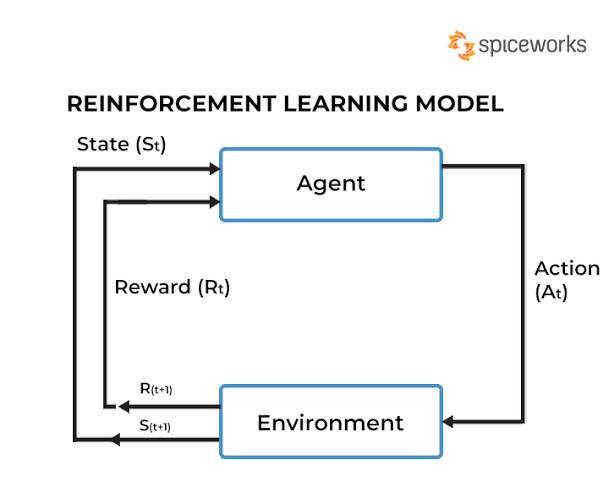

- What is reinforcement learning and its components according to your understanding? Giving examples of each component according to the diagram consider the Cartpole problem.

- ANS 
    - Agent is The Neural network Controller that decides force to apply to the Cart and adjust weight to improve controller
    - Envioronment is Physics of Cartpole system like Cart weight, pole weight, etc. 
    - Action is Force that push the Cart to the left or right
    - State is Cart position, Cart velocity, Pole angle, Pole angular velocity
    - Reward is Time step that agent can Alive and did not get terminate or penalty

- What is the difference between the reward, return, and the value function?

- ANS
    - Reward is scalar feedback signal at the time t from how good that action was(include reward and penalty).
    - Return is The cumulative reward and this is ultimate goal of agent
    - Value function is Expected cumulatve reward of a state s it mean agent can be in any state and each state has different Return(cumulative reward)

- Consider policy, state, value function, and model as mathematical functions, what would each one take as input and output?

- ANS
    - Policy
        - Deterministic policy: 
            - input is state 
            - output is action
        - Stochastic policy:
            - input is state 
            - output is Probability distribution over actions action
    - State (agent state)
        - input is current state and action 
        - output is next state
    - Value function
        - input is state
        - output is cumulative of reward (discounted sum of future rewards)
    - Model as mathematical
        - input is current state and action 
        - output is next state and reward
